In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolorsx
from matplotlib.patches import Circle

from regions import Regions

import os
from glob import glob

from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.nddata import Cutout2D

from reproject import reproject_exact

from AstroColour.AstroColour import RGB

import matplotlib.patheffects as patheffects

%matplotlib widget

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig_width_pt = 244.0  # Get this from LaTeX using \the\columnwidth
text_width_pt = 508.0 # Get this from LaTeX using \the\textwidth

inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt*1.5 # width in inches
fig_width_full = text_width_pt*inches_per_pt*1.5  # 17
fig_height =fig_width*golden_mean # height in inches
fig_size = [fig_width,fig_height] #(9,5.5) #(9, 4.5)
fig_height_full = fig_width_full*golden_mean

In [3]:
path = '/Users/zgl12/Python_Scripts/Image_Processing/MAST/MAST_2025-11-25T20_43_45.354Z/'
reg_file = '/Users/zgl12/Downloads/critics_zs5.13_wcs.reg'

name = f'jw06882-o038_t041_nircam_clear-f115w_i2d.fits'

hdu = fits.open(path+name)
data = hdu[1].data
header = hdu[1].header
hdr = hdu[0].header
wcs = WCS(header)
# hdu.info()
# print(repr(header))
hdu.close()

In [4]:
colour = np.load('/Users/zgl12/sneos_rgb.npy')
regions = Regions.read(reg_file)

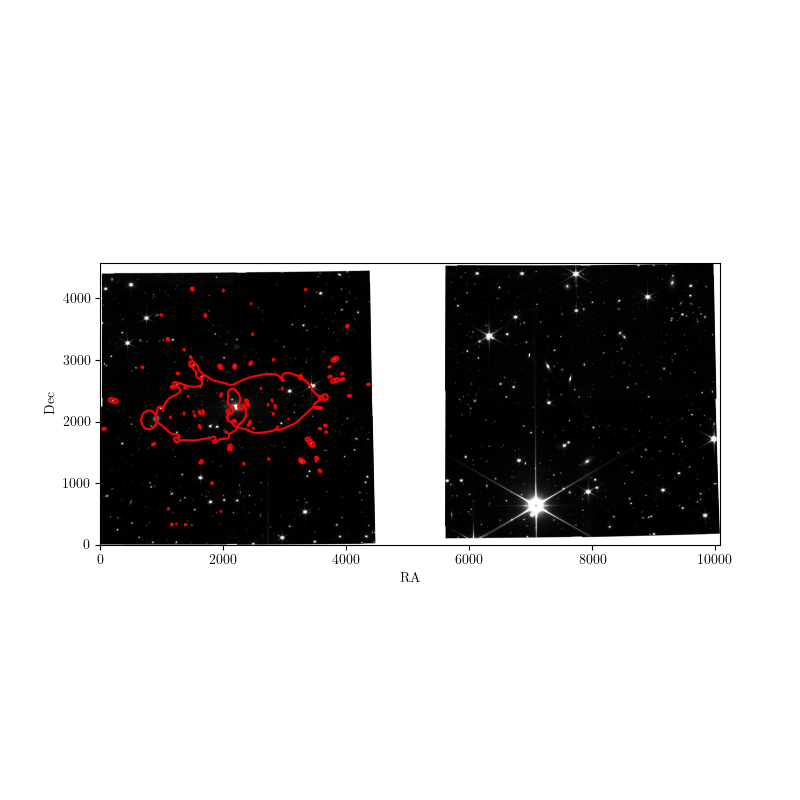

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Plot the FITS image
ax.imshow(data, origin='lower', cmap='gray', 
          vmin=np.nanpercentile(data, 35),
          vmax=np.nanpercentile(data, 99.5))

# Overlay the DS9 regions
for region in regions:
    pix_region = region.to_pixel(wcs)
    pix_region.plot(ax=ax, color='red', linewidth=1.5)

ax.set_xlabel("RA")
ax.set_ylabel("Dec")
plt.show()